<a href="https://colab.research.google.com/github/KasiaIonova/Python_final-work/blob/main/Python_final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import pylab
import seaborn as sns


1.Загрузите файл HR.csv в pandas dataframe

In [3]:
df = pd.read_csv('HR.csv',sep = ',', encoding ='ISO-8859-1')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2.Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.mode().iloc[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

3.Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [31]:
df_corr = df[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company']]

In [32]:
df_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [34]:
def salary_lewel(salary):
  if salary == "low":
      return 0
  elif salary =='medium':
      return 1
  else:
      return 2

In [37]:
df  ['salary_num'] = df ['salary'].apply(salary_lewel)
df_corr = df[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company', 'salary_num']]

In [39]:
df_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.048715
salary_num,0.050022,-0.013002,-0.001803,-0.002242,0.048715,1.000000


4.Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [8]:
employee_count_by_department = df['department'].value_counts()
employee_count_by_department

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5.Показать распределение сотрудников по зарплатам.

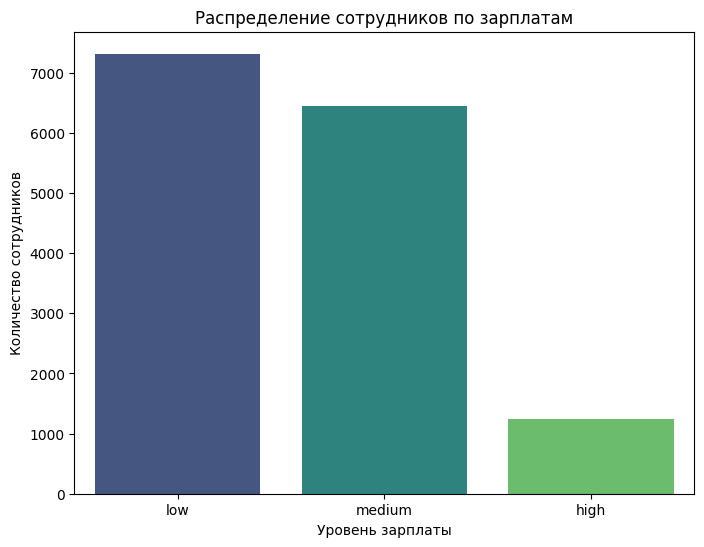

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=df, palette='viridis')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

6.Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

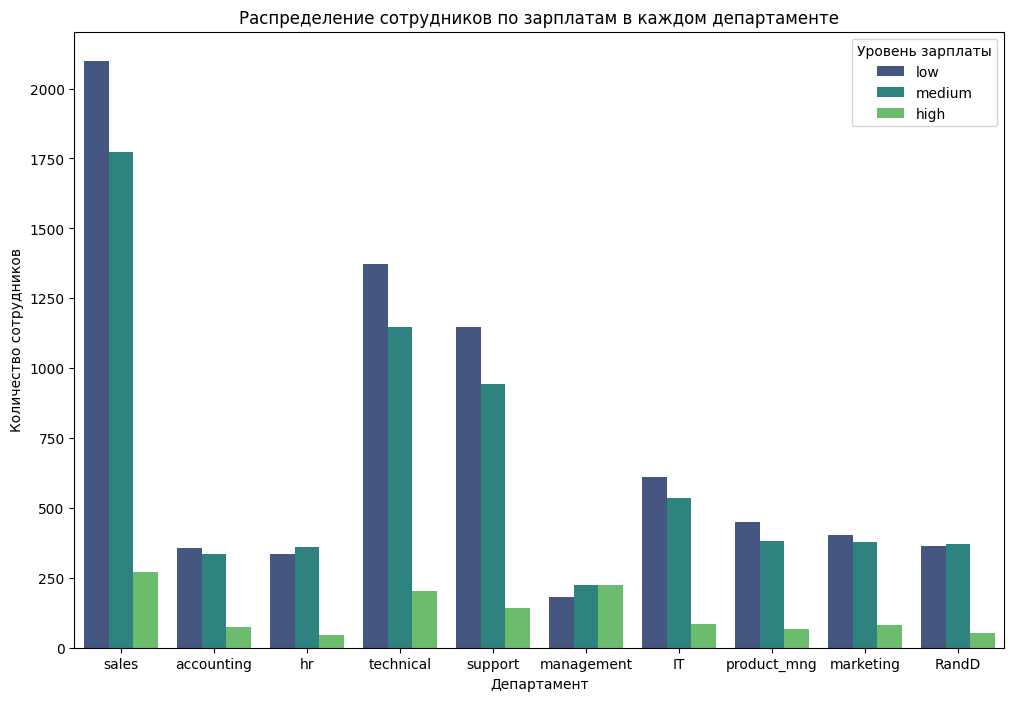

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(x='department', hue='salary', data=df, palette='viridis')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уровень зарплаты')
plt.show()

7.Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.(Для проверки данной гипотезы можно воспользоваться t-тестом, который позволяет сравнивать средние значения двух групп и определить, есть ли статистически значимые различия между ними.)

H0 =  нет различий в среднем времени, проведенном на работе, между сотрудниками с высоким и низким окладом.
H1 = различия существуют.

Выбираем данные для сотрудников с высоким и низким окладом:

In [11]:
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

In [12]:
t_statistic, p_value = ttest_ind(high_salary, low_salary)

In [13]:
print(f"t-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

t-статистика: -0.7288680398062308
P-значение: 0.4661023478267259


Проверяем уровень значимости:

In [14]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Не отвергаем нулевую гипотезу: различия не статистически значимы.")

Не отвергаем нулевую гипотезу: различия не статистически значимы.


8.Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

- доля сотрудников с повышением за последние 5 лет:

Рассчитываем долю сотрудников с повышением за последние 5 лет для уволившихся

In [15]:
resigned_promotion_percentage = (df[df['left'] == 1]['promotion_last_5years'].value_counts(normalize=True) * 100).get(1, 0)

Рассчитываем долю сотрудников с повышением за последние 5 лет для не уволившихся

In [16]:
not_resigned_promotion_percentage = (df[df['left'] == 0]['promotion_last_5years'].value_counts(normalize=True) * 100).get(1, 0)

In [17]:
print(f"Доля уволившихся с повышением за последние 5 лет: {resigned_promotion_percentage:.2f}%")
print(f"Доля не уволившихся с повышением за последние 5 лет: {not_resigned_promotion_percentage:.2f}%")

Доля уволившихся с повышением за последние 5 лет: 0.53%
Доля не уволившихся с повышением за последние 5 лет: 2.63%


-cредняя степень удовлетворенности:

Рассчитываем среднюю степень удовлетворенности для уволившихся

In [18]:
average_satisfaction_resigned = df[df['left'] == 1]['satisfaction_level'].mean()

Рассчитываем среднюю степень удовлетворенности для не уволившихся

In [19]:
average_satisfaction_not_resigned = df[df['left'] == 0]['satisfaction_level'].mean()

In [20]:
print(f"Средняя степень удовлетворенности уволившихся: {average_satisfaction_resigned:.2f}")
print(f"Средняя степень удовлетворенности не уволившихся: {average_satisfaction_not_resigned:.2f}")

Средняя степень удовлетворенности уволившихся: 0.44
Средняя степень удовлетворенности не уволившихся: 0.67


-cреднее количество проектов:

Рассчитываем среднее количество проектов для уволившихся

In [21]:
average_projects_resigned = df[df['left'] == 1]['number_project'].mean()

Рассчитываем среднее количество проектов для не уволившихся

In [22]:
average_projects_not_resigned = df[df['left'] == 0]['number_project'].mean()

In [23]:
print(f"Среднее количество проектов уволившихся: {average_projects_resigned:.2f}")
print(f"Среднее количество проектов не уволившихся: {average_projects_not_resigned:.2f}")

Среднее количество проектов уволившихся: 3.86
Среднее количество проектов не уволившихся: 3.79


9.Pазделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

-Исключаем 'department' и 'salary' из признаков;

-работаем с переменной - 'left';

-pазделяем данные на обучающую и тестовую выборки;

-cоздаем и обучаем модель LDA;

-делаем предсказания на тестовой выборке;

-oцениваем качество модели;

-pезультат.

In [24]:
features = df.drop(['left', 'department', 'salary'], axis=1)

In [25]:
target = df['left']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [27]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [28]:
y_pred = lda_model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [30]:
print(f"Точность модели: {accuracy:.2f}")
print("\nМатрица ошибок:")
print(confusion_mat)
print("\nОтчет по классификации:")
print(classification_rep)

Точность модели: 0.75

Матрица ошибок:
[[2094  200]
 [ 540  166]]

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



10. Загрузить jupyter notebook с решение на github и прислать ссылку